In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import losses

from tensorflow.keras.metrics import AUC

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score

In [118]:
df = pd.read_csv('data-preproccessed.csv')
df

,Unnamed: 0,text,reply,retweet,like,view,date,word_count,char_count,#tag,@,hastagh,tweet_length,total_score
0,1,water for climate resilience and environment w...,0,0,0,108,1 saat önce,30,278,15,0,"['#vajiramandravi', '#unwaterconference', '#wa...",273,0
1,2,bbc5live cannot right that more than half bill...,0,0,0,8,1 saat önce,21,121,1,1,['#Savewater'],111,0
2,3,bbc5live has time scrap the standing charge an...,0,0,0,3,1 saat önce,45,263,1,1,['#Savewater'],270,0
3,4,watersecurity managing coastal aquifers projec...,0,3,3,108,1 saat önce,38,280,1,3,['#WaterSecurity'],279,6
4,5,climate change intensifies and rainfall patter...,0,1,1,19,1 saat önce,20,181,3,0,"['#TugwiMukosi', '#Zimbabwe', '#WaterSecurity']",181,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,6757,this month nature launched new online journal ...,0,1,1,74,26 Oca,29,250,5,1,"['#sanitation', '#openscience', '#wastewater',...",242,2
6044,6758,walking urban green spaces better for than wal...,0,1,1,84,26 Oca,19,237,4,0,"['#Walking', '#health', '#GreenInfrastructure'...",234,2
6045,6759,these kids came together protest the worlds mo...,0,1,3,70,26 Oca,21,160,1,0,['#WaterIsLife'],160,4
6046,6760,patterned green roofs unique impactful and sur...,0,3,3,185,26 Oca,14,237,3,1,"['#greeninfrastructure', '#greenroofs', '#stor...",237,6


In [119]:
# "retweet" sütununda değere göre sınıflandırarak yeni bir kolon ekle
df["retweet_score"] = df["retweet"].apply(lambda x: 0 if x < 3 else 1)
# Yeni kolonu yazdır
print(df["retweet_score"])

0       0
1       0
2       0
3       1
4       0
       ..
6043    0
6044    0
6045    0
6046    1
6047    0
Name: retweet_score, Length: 6048, dtype: int64


In [120]:
df["retweet_score"].value_counts()

0    4689
1    1359
Name: retweet_score, dtype: int64

In [124]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(df['text'])

# Bağımlı ve bağımsız değişkenleri belirleme

X_numeric = df[['view', 'reply', 'like']].values
y = df['retweet_score'].values


In [125]:
scaler = MinMaxScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

In [126]:
from scipy.sparse import hstack

X = hstack((X_numeric_scaled, X_text))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


(array([3750.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1088.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

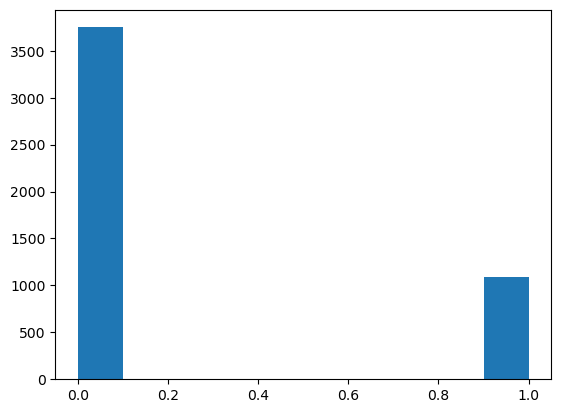

In [127]:
plt.hist(y_train)

In [132]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import time

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision',
                                          'Recall', 'F1-Score', 'Training time',
                                          'Prediction time'])

def log_scores(model_name, y_test, y_predictions):
    accuracy = accuracy_score(y_test, y_predictions)
    precision = precision_score(y_test, y_predictions, average='weighted')
    recall = recall_score(y_test, y_predictions, average='weighted')
    precision = precision_score(y_test, y_predictions, average='weighted')
    f1 = f1_score(y_test, y_predictions, average='weighted')

    # save the scores in model_performance dataframe
    model_performance.loc[model_name] = [accuracy, precision, recall, f1,
                                       end_train-start, end_predict-end_train]

In [133]:
df.columns

Index(['Unnamed: 0', 'text', 'reply', 'retweet', 'like', 'view', 'date',
       'word_count', 'char_count', '#tag', '@', 'hastagh', 'tweet_length',
       'total_score', 'retweet_score'],
      dtype='object')

In [136]:
from sklearn.tree import DecisionTreeClassifier
import time

start = time.time()
model = DecisionTreeClassifier(max_depth = 22).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Decision Tree", y_test, y_predictions)

In [137]:
print("Decision Tree\n" + classification_report(y_test, y_predictions))

Decision Tree
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       939
           1       0.79      0.60      0.68       271

    accuracy                           0.87      1210
   macro avg       0.84      0.78      0.80      1210
weighted avg       0.87      0.87      0.87      1210



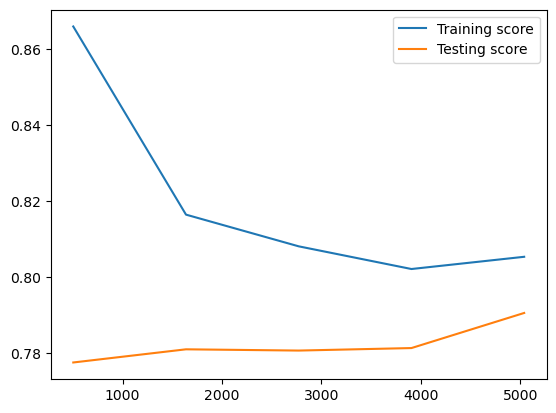

In [138]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=6)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

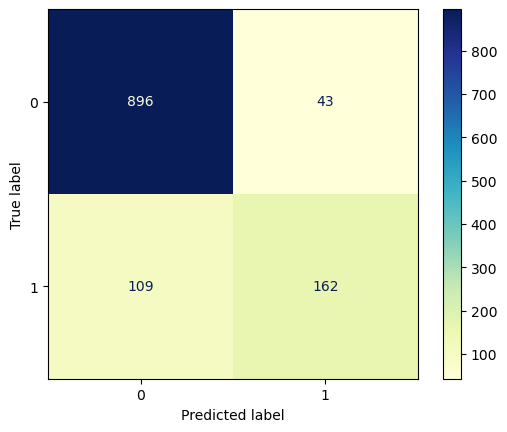

In [139]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu) 

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# create the model
knn = KNeighborsClassifier()

# define the parameter grid
param_grid = {'n_neighbors': range(2, 20)}

# create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)

C:\Users\seda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\seda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

{'n_neighbors': 7}


C:\Users\seda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
start = time.time()
model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # predictions from the testset
end_predict = time.time()

# evaluate the model
log_scores("k-NN", y_test, y_predictions)

C:\Users\seda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [22]:
print("k-NN Model\n" + classification_report(y_test, y_predictions))

k-NN Model
              precision    recall  f1-score   support

           0       0.67      0.94      0.78       777
           1       0.59      0.15      0.24       433

    accuracy                           0.66      1210
   macro avg       0.63      0.55      0.51      1210
weighted avg       0.64      0.66      0.59      1210



C:\Users\seda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\seda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

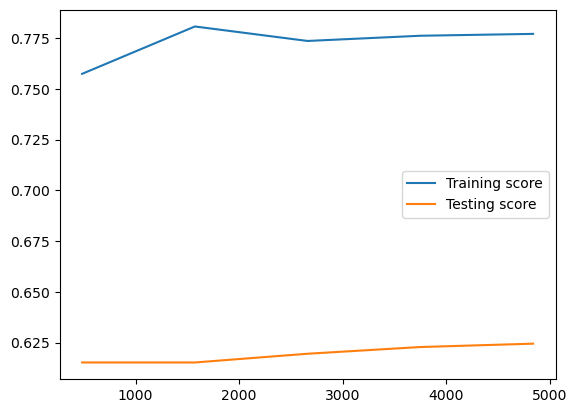

In [23]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

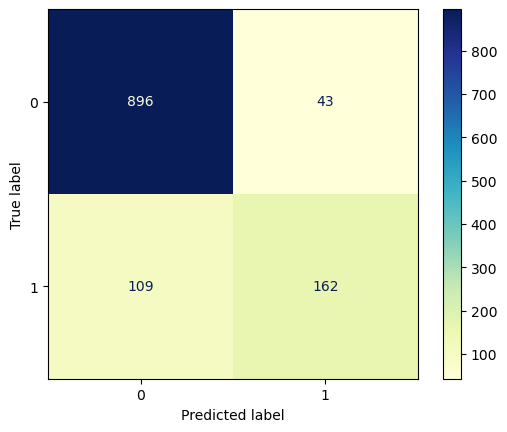

In [141]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

In [142]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
model = RandomForestClassifier(n_estimators=200, n_jobs=-1,
                               random_state=0, bootstrap=True).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Random Forest", y_test, y_predictions)

In [143]:
print("Random Forest Model\n" + classification_report(y_test, y_predictions))

Random Forest Model
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       939
           1       0.85      0.56      0.68       271

    accuracy                           0.88      1210
   macro avg       0.87      0.77      0.80      1210
weighted avg       0.88      0.88      0.87      1210



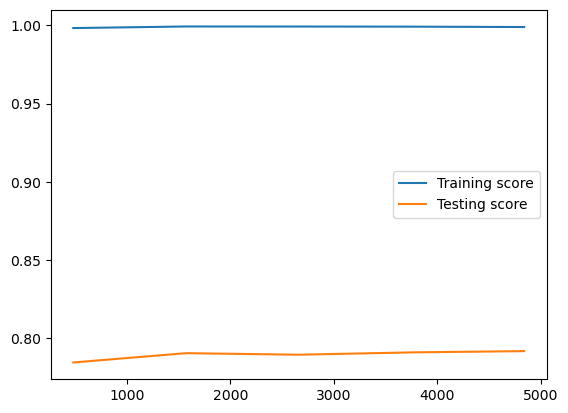

In [144]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

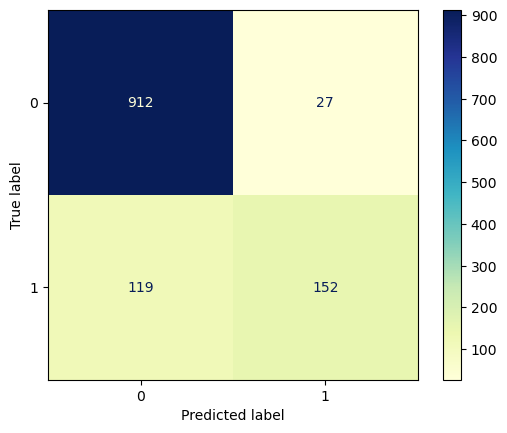

In [145]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

start = time.time()
model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=80, max_depth=10).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gradient Boosting", y_test, y_predictions)

In [147]:
print("Gradient Boosting\n" + classification_report(y_test, y_predictions))

Gradient Boosting
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       939
           1       0.86      0.54      0.67       271

    accuracy                           0.88      1210
   macro avg       0.87      0.76      0.80      1210
weighted avg       0.88      0.88      0.87      1210



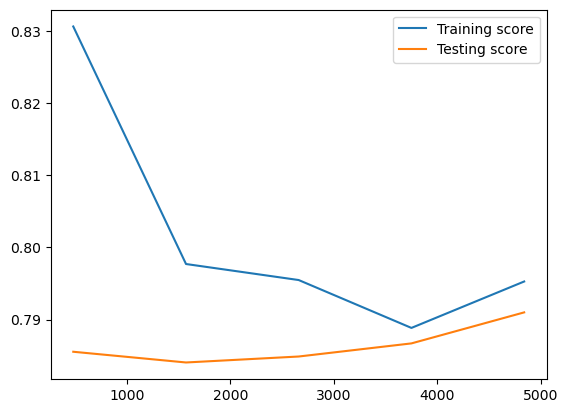

In [148]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

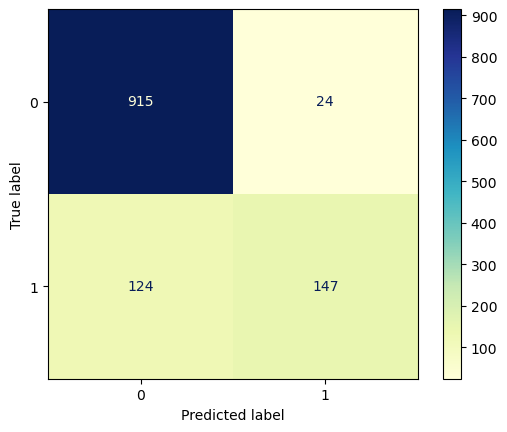

In [149]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

In [151]:
from sklearn.naive_bayes import GaussianNB

# Convert sparse matrix to dense numpy array
X_train_array = X_train.toarray()
X_test_array = X_test.toarray()

start = time.time()
model = GaussianNB(var_smoothing=1e-4).fit(X_train_array, y_train)
end_train = time.time()
y_predictions = model.predict(X_test_array)
end_predict = time.time()

# evaluate the model
log_scores("Gaussian Naive Bayes", y_test, y_predictions)


In [152]:
print("Gaussian Naive Bayes\n" + classification_report(y_test, y_predictions))

Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       939
           1       0.35      0.43      0.39       271

    accuracy                           0.69      1210
   macro avg       0.59      0.60      0.59      1210
weighted avg       0.72      0.69      0.70      1210



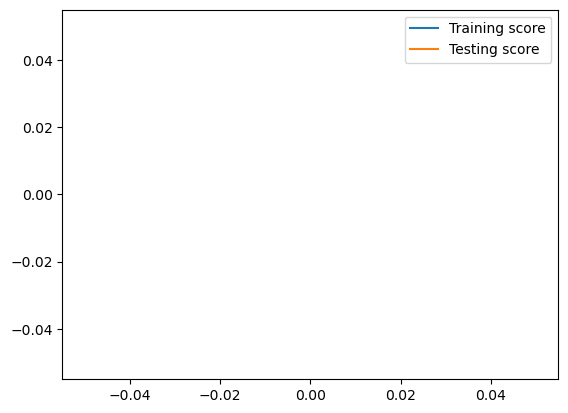

In [153]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

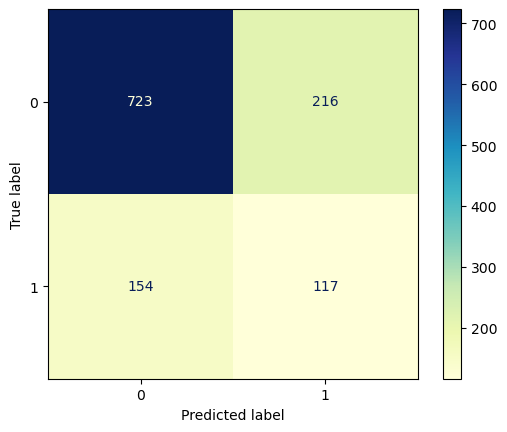

In [154]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

In [155]:
from sklearn.neural_network import MLPClassifier

start = time.time()
model = MLPClassifier(random_state=1, max_iter=500, learning_rate="invscaling").fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Multi-layer Perceptron", y_test, y_predictions)

In [156]:
print("Multi-layer Perceptron\n" + classification_report(y_test, y_predictions))

Multi-layer Perceptron
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       939
           1       0.44      0.31      0.36       271

    accuracy                           0.76      1210
   macro avg       0.63      0.60      0.61      1210
weighted avg       0.73      0.76      0.74      1210



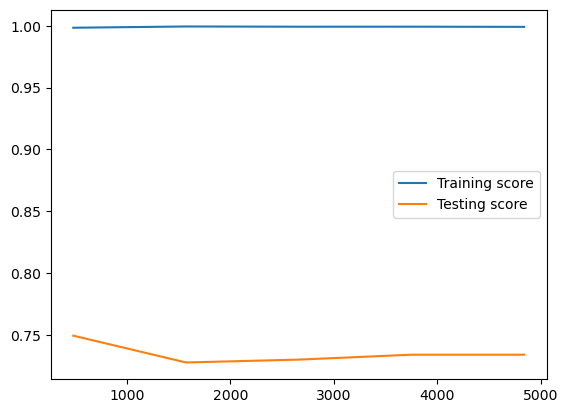

In [157]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

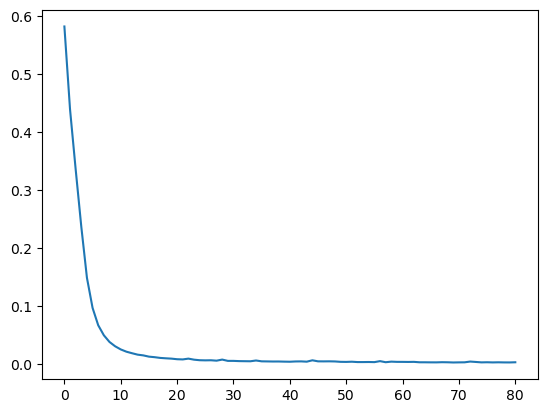

In [158]:
plt.plot(model.loss_curve_)

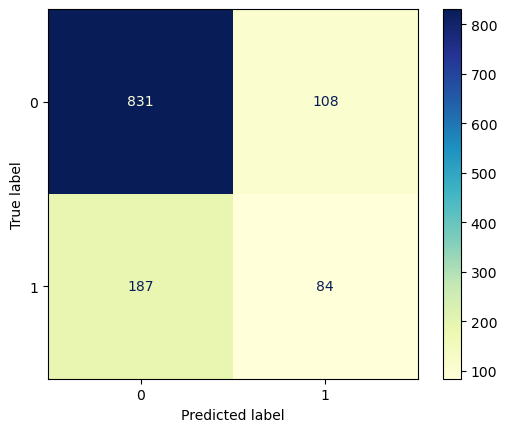

In [159]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu) 

In [160]:
model_performance.style.background_gradient(cmap='coolwarm')

,Accuracy,Precision,Recall,F1-Score,Training time,Prediction time
Decision Tree,0.874380,0.868855,0.874380,0.867804,0.319908,0.000000
Random Forest,0.879339,0.876646,0.879339,0.869822,4.323879,0.069408
Gradient Boosting,0.877686,0.875950,0.877686,0.866941,21.412920,0.000000
Gaussian Naive Bayes,0.694215,0.718454,0.694215,0.704689,2.483342,0.812303
Multi-layer Perceptron,0.756198,0.731466,0.756198,0.740320,297.249376,0.000000
